In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("C:/Users/Himanshu/Desktop/postman project/sales_data.xlsx")
data.head()

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
transaction id           541909 non-null object
product id               541909 non-null object
product description      540455 non-null object
quantity sold            541909 non-null int64
transaction timestamp    541909 non-null datetime64[ns]
unit price               541909 non-null float64
customer id              406829 non-null float64
transaction country      541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
data.rename(index=str, columns={'transaction id': 'transaction_id',
                              'product id' : 'product_id',
                              'product description' : 'product_description',
                              'quantity sold' : 'quantity_sold',
                              'transaction timestamp' : 'transaction_timestamp',
                              'unit price' : 'unit_price',
                              'customer id' : 'customer_id',
                              'transaction country' : 'transaction_country'}, inplace=True)

In [5]:
data.isnull().sum().sort_values(ascending=False)

customer_id              135080
product_description        1454
transaction_country           0
unit_price                    0
transaction_timestamp         0
quantity_sold                 0
product_id                    0
transaction_id                0
dtype: int64

In [6]:
data_new=data.dropna()

In [7]:
data_new.isnull().sum().sort_values(ascending=False)

transaction_country      0
customer_id              0
unit_price               0
transaction_timestamp    0
quantity_sold            0
product_description      0
product_id               0
transaction_id           0
dtype: int64

In [8]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
transaction_id           406829 non-null object
product_id               406829 non-null object
product_description      406829 non-null object
quantity_sold            406829 non-null int64
transaction_timestamp    406829 non-null datetime64[ns]
unit_price               406829 non-null float64
customer_id              406829 non-null float64
transaction_country      406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [9]:
data_new.describe().round(2)

,quantity_sold,unit_price,customer_id
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00



# removing negative values in the dataset

In [10]:
data_new=data_new[data_new.quantity_sold > 0]
data_new.describe().round(2)

,quantity_sold,unit_price,customer_id
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


In [11]:
data_new.insert(loc=2, column='year_month', value=data_new['transaction_timestamp'].map(lambda x: 100*x.year + x.month))
data_new.insert(loc=3, column='month', value=data_new.transaction_timestamp.dt.month)
data_new.insert(loc=4, column='day', value=(data_new.transaction_timestamp.dt.dayofweek)+1)
data_new.insert(loc=5, column='hour', value=data_new.transaction_timestamp.dt.hour)

In [12]:
data_new.head()

,transaction_id,product_id,year_month,month,day,hour,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
data_new.groupby(by=['customer_id','transaction_country'], as_index=False)['transaction_id'].count().head()

,customer_id,transaction_country,transaction_id
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


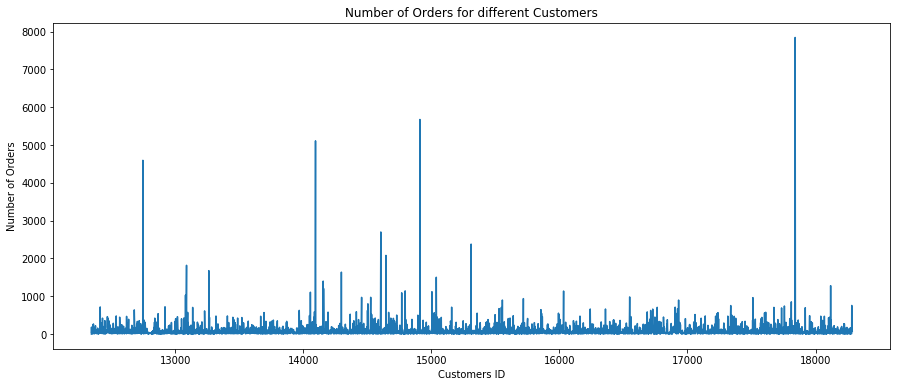

In [14]:
no_of_orders = data_new.groupby(by=['customer_id','transaction_country'], as_index=False)['transaction_id'].count()

plt.subplots(figsize=(15,6))
plt.plot(no_of_orders.customer_id, no_of_orders.transaction_id)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of orders for different customers')
plt.show()

In [15]:
no_of_orders.sort_values(by='transaction_id', ascending=False).head()

,customer_id,transaction_country,transaction_id
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700


In [16]:
data_new['amount_spent'] = data_new['quantity_sold'] * data_new['unit_price']

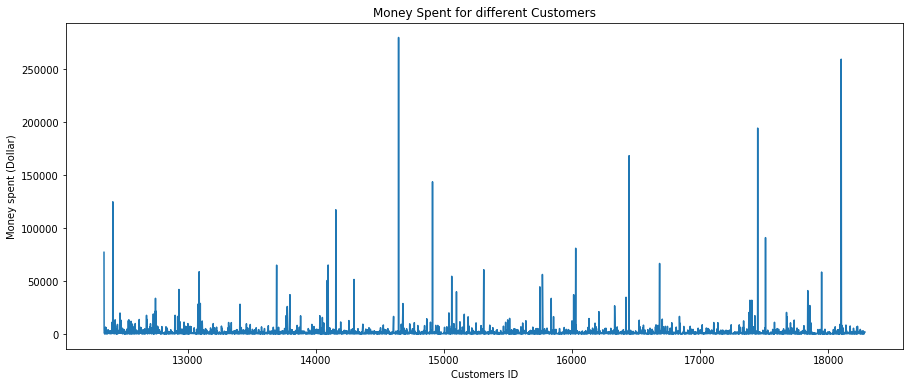

In [17]:
money_spent = data_new.groupby(by=['customer_id','transaction_country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.customer_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [18]:
money_spent.sort_values(by='amount_spent', ascending=False).head(10)

,customer_id,transaction_country,amount_spent
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194550.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143825.06
57,12415.0,Australia,124914.53
1342,14156.0,EIRE,117379.63
3780,17511.0,United Kingdom,91062.38
2711,16029.0,United Kingdom,81024.84
0,12346.0,United Kingdom,77183.60


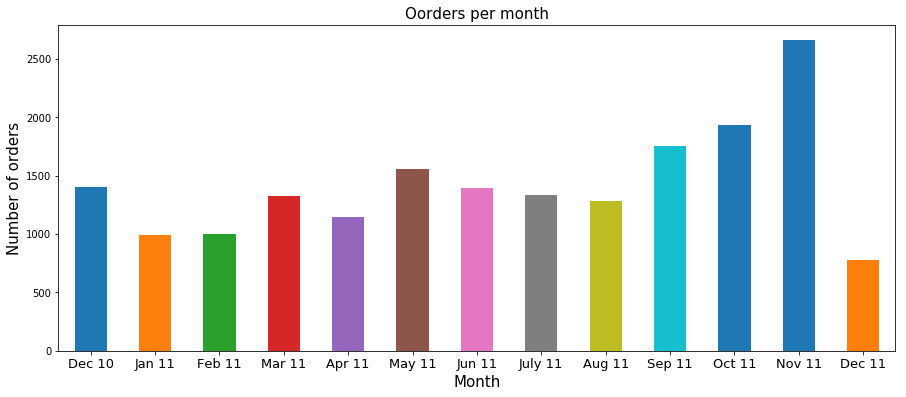

In [19]:
opder_per_month = data_new.groupby('transaction_id')['year_month'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
opder_per_month.set_xlabel('Month',fontsize=15)
opder_per_month.set_ylabel('Number of orders',fontsize=15)
opder_per_month.set_title('Oorders per month',fontsize=15)
opder_per_month.set_xticklabels(('Dec 10','Jan 11','Feb 11','Mar 11','Apr 11','May 11','Jun 11','July 11','Aug 11','Sep 11','Oct 11','Nov 11','Dec 11'), rotation='horizontal', fontsize=13)
plt.show()

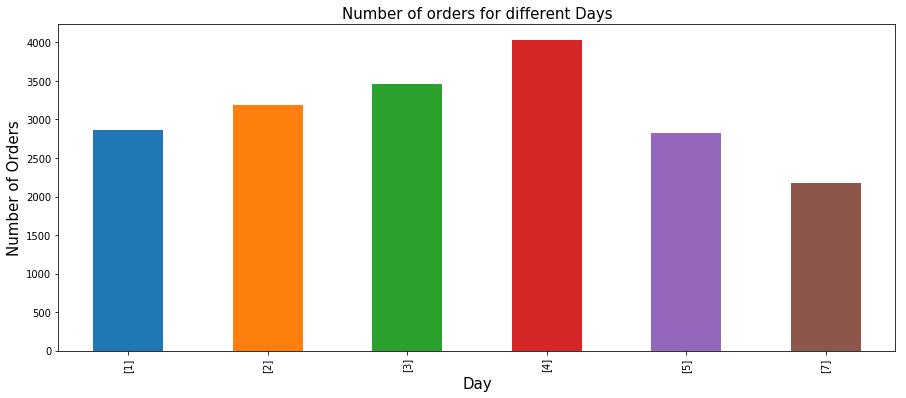

In [20]:
order_per_day = data_new.groupby('transaction_id')['day'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
order_per_day.set_xlabel('Day',fontsize=15)
order_per_day.set_ylabel('Number of Orders',fontsize=15)
order_per_day.set_title('Number of orders for different Days',fontsize=15)
plt.show()

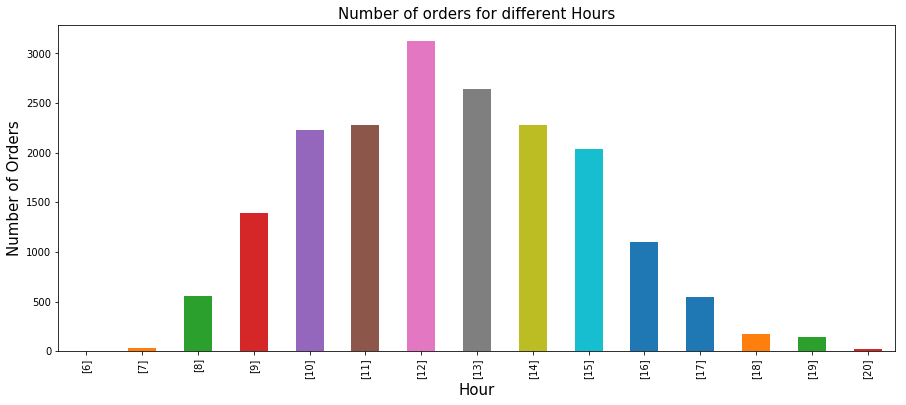

In [21]:
order_per_hour = data_new.groupby('transaction_id')['hour'].unique().value_counts().iloc[:-1].sort_index().plot('bar',figsize=(15,6))
order_per_hour.set_xlabel('Hour',fontsize=15)
order_per_hour.set_ylabel('Number of Orders',fontsize=15)
order_per_hour.set_title('Number of orders for different Hours',fontsize=15)

plt.show()

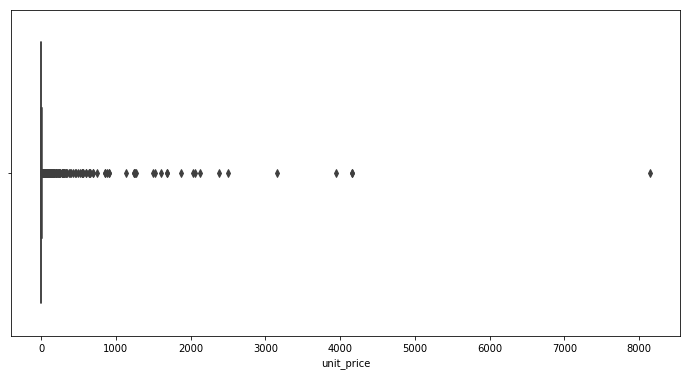

In [22]:
import seaborn as sns
plt.subplots(figsize=(12,6))
sns.boxplot(data_new.unit_price)
plt.show()

In [23]:
data_unit_price_zero = data_new[data_new.unit_price == 0]

In [24]:
data_unit_price_zero.head()

,transaction_id,product_id,year_month,month,day,hour,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country,amount_spent
9302,537197,22841,201012,12,7,14,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,0.0
33576,539263,22580,201012,12,4,14,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0.0
40089,539722,22423,201012,12,2,13,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,0.0
47068,540372,22090,201101,1,4,16,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0
47070,540372,22553,201101,1,4,16,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0


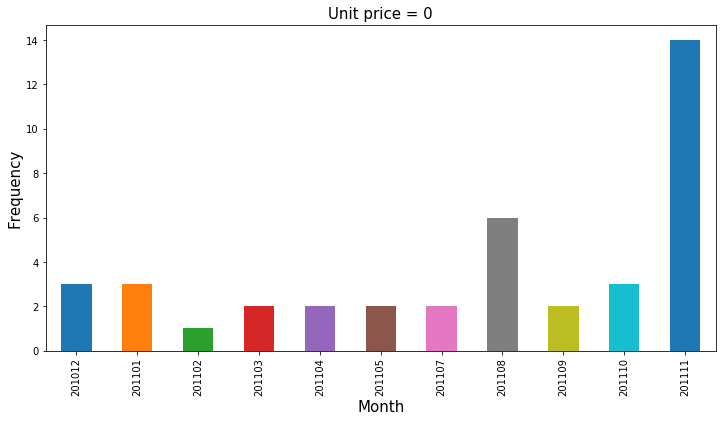

In [114]:
data_per_month_zerounitprice = data_unit_price_zero.year_month.value_counts().sort_index().plot('bar',figsize=(12,6))
data_per_month_zerounitprice.set_xlabel('Month',fontsize=15)
data_per_month_zerounitprice.set_ylabel('Frequency',fontsize=15)
data_per_month_zerounitprice.set_title('Unit price = 0',fontsize=15)
plt.show()

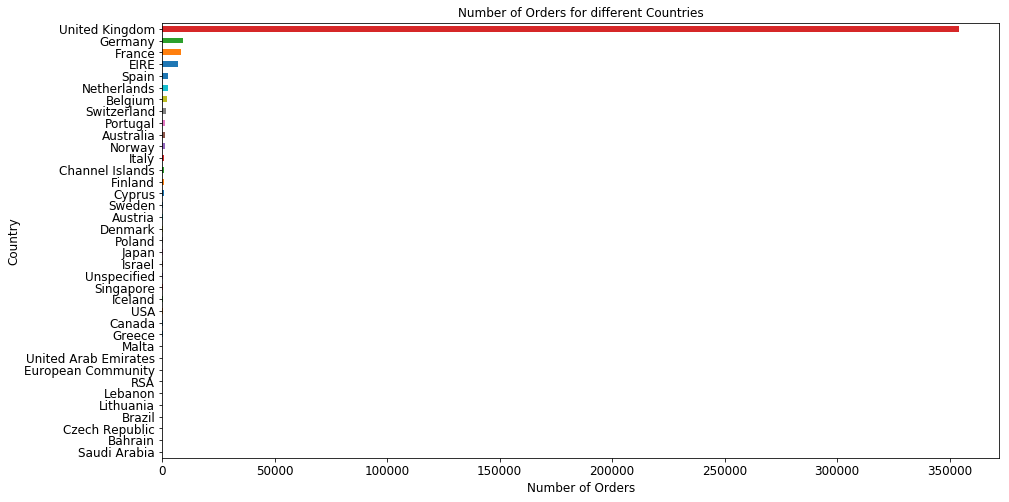

In [26]:
data_per_country= data_new.groupby('transaction_country')['transaction_id'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
data_per_country.plot('barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

In [27]:
data_new['amount_spent'] = data_new['quantity_sold'] * data_new['unit_price']

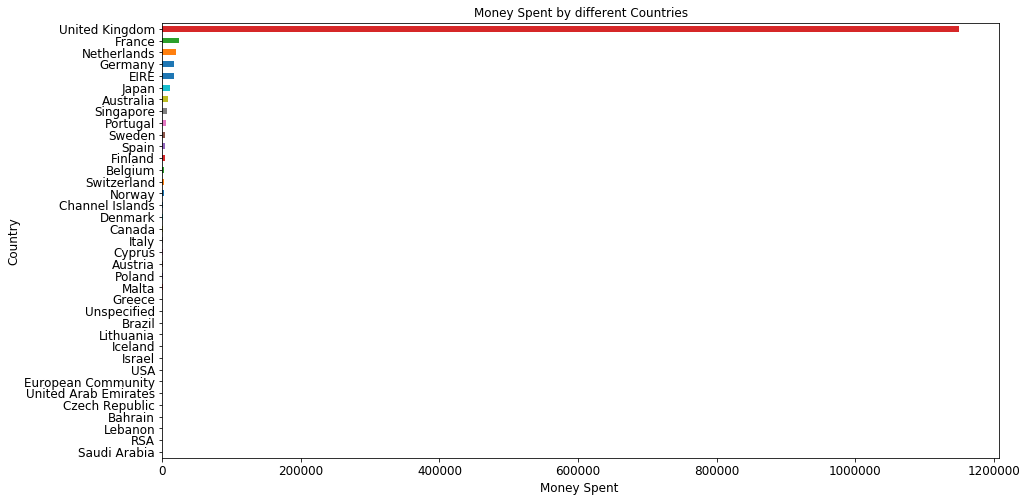

In [115]:
group_country_amount_spent = data_new.groupby('transaction_country')['amount_spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12)
plt.xlabel('Money Spent ', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

In [75]:
customer_amount=data_new.groupby('customer_id')['amount_spent'].agg(np.sum).sort_values(ascending=False)
customer_amount.head(20)

customer_id
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
16684.0     66653.56
14096.0     65164.79
13694.0     65039.62
15311.0     60767.90
13089.0     58825.83
17949.0     58510.48
15769.0     56252.72
15061.0     54534.14
14298.0     51527.30
14088.0     50491.81
Name: amount_spent, dtype: float64

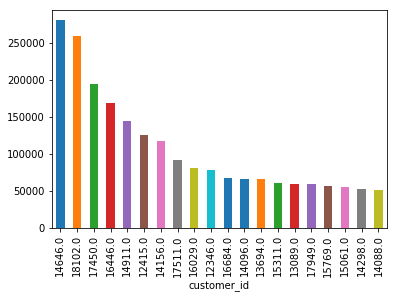

In [77]:
customer_amount.head(20).plot.bar()

In [81]:
frequent_product_id = data_new.groupby('product_description')
frequent_product_quantity = frequent_product_id['quantity_sold'].agg(np.sum).sort_values(ascending=False)
frequent_product_quantity.head(20)

product_description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
PACK OF 12 LONDON TISSUES             25345
PACK OF 60 PINK PAISLEY CAKE CASES    24264
BROCADE RING PURSE                    22963
VICTORIAN GLASS HANGING T-LIGHT       22433
ASSORTED COLOURS SILK FAN             21876
RED  HARMONICA IN BOX                 20975
JUMBO BAG PINK POLKADOT               20165
SMALL POPCORN HOLDER                  18252
LUNCH BAG RED RETROSPOT               17697
60 TEATIME FAIRY CAKE CASES           17689
Name: quantity_sold, dtype: int64

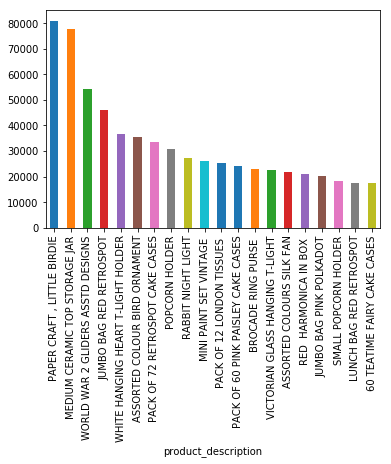

In [83]:
frequent_product_quantity.head(20).plot.bar()

In [29]:
min(data_new.transaction_timestamp)

Timestamp('2010-12-01 08:26:00')

In [30]:
max(data_new.transaction_timestamp)

Timestamp('2011-12-09 12:50:00')

In [31]:
print("Number of unique customers:", data_new['customer_id'].nunique())

Number of unique customers: 4339


In [42]:
data_new['date_purchase']=pd.DatetimeIndex(data_new['transaction_timestamp']).date

In [43]:
data_new.head()

,transaction_id,product_id,year_month,month,day,hour,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country,amount_spent,date_purchase
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [116]:
recenct_purchase=data_new.groupby(by='customer_id',as_index=False)['date_purchase'].max()
recenct_purchase.columns = ['customer_id','date_purchase']
recenct_purchase.head()

,customer_id,date_purchase
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [67]:
import datetime as dt
now=dt.date(2011,12,9)
print(now)

2011-12-09


In [72]:
recenct_purchase['Recency'] = recenct_purchase['date_purchasex'].apply(lambda x: (now - x).days)
recenct_purchase.head()

,customer_id,date_purchasex,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


In [93]:
data_new_copy =data_new
data_new_copy.drop_duplicates(subset=['transaction_id','customer_id'], keep="first", inplace=True)

frequency=data_new_copy.groupby(by=['customer_id'], as_index=False)['transaction_id'].count()
frequency.columns = ['customer_id','Frequency']
frequency.head()


,customer_id,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [95]:
monetary = data_new.groupby(by='customer_id',as_index=False).agg({'amount_spent': 'sum'})
monetary.columns = ['customer_id','Monetary']
monetary.head()

,customer_id,Monetary
0,12346.0,77183.60
1,12347.0,163.16
2,12348.0,331.36
3,12349.0,15.00
4,12350.0,25.20


In [97]:
recency_frequency = recenct_purchase.merge(frequency,on='customer_id')
recency_frequency.head()

,customer_id,date_purchasex,Recency,Frequency
0,12346.0,2011-01-18,325,1
1,12347.0,2011-12-07,2,7
2,12348.0,2011-09-25,75,4
3,12349.0,2011-11-21,18,1
4,12350.0,2011-02-02,310,1


In [99]:
rfm=recency_frequency.merge(monetary,on='customer_id')
rfm.set_index('customer_id',inplace=True)
rfm.head()

,date_purchasex,Recency,Frequency,Monetary
customer_id,,,,
12346.0,2011-01-18,325,1,77183.60
12347.0,2011-12-07,2,7,163.16
12348.0,2011-09-25,75,4,331.36
12349.0,2011-11-21,18,1,15.00
12350.0,2011-02-02,310,1,25.20


In [104]:
quantiles=rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,1.0,17.700
0.50,50.0,2.0,47.000
0.75,141.5,5.0,130.045


In [105]:
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 17.700000000000003, 0.5: 47.0, 0.75: 130.04500000000002}}

In [106]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [107]:
rfm_segmentation = rfm
rfm_segmentation['Rquartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['Fquartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['Mquartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [108]:
rfm_segmentation.head()

,date_purchasex,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
customer_id,,,,,,,
12346.0,2011-01-18,325,1,77183.60,1,1,4
12347.0,2011-12-07,2,7,163.16,4,4,4
12348.0,2011-09-25,75,4,331.36,2,3,4
12349.0,2011-11-21,18,1,15.00,3,1,1
12350.0,2011-02-02,310,1,25.20,1,1,2


In [109]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,date_purchasex,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
customer_id,,,,,,,,
12346.0,2011-01-18,325,1,77183.60,1,1,4,114
12347.0,2011-12-07,2,7,163.16,4,4,4,444
12348.0,2011-09-25,75,4,331.36,2,3,4,234
12349.0,2011-11-21,18,1,15.00,3,1,1,311
12350.0,2011-02-02,310,1,25.20,1,1,2,112


In [111]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,date_purchasex,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
customer_id,,,,,,,,
18102.0,2011-12-09,0,60,42053.60,4,4,4,444
17949.0,2011-12-08,1,45,29999.69,4,4,4,444
17450.0,2011-12-01,8,46,26768.97,4,4,4,444
14646.0,2011-12-08,1,74,19045.06,4,4,4,444
16013.0,2011-12-06,3,47,17895.28,4,4,4,444
16333.0,2011-12-02,7,22,14418.96,4,4,4,444
15769.0,2011-12-02,7,26,11752.64,4,4,4,444
14911.0,2011-12-08,1,201,11071.48,4,4,4,444
12901.0,2011-12-01,8,28,9230.45,4,4,4,444


In [117]:
print("Best Customers: ",len(rfm[rfm['RFMScore']=='444']))


Best Customers:  401


In [ ]:
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

In [120]:
print("Customers who spend most: ",len(rfm_data[rfm_data['M_Quartile']==4]))

Customers who spend most:  1085


In [113]:
X = dfg.iloc[:, [1, 2]].values
# Feature Scaling
sc_X = StandardScaler()
X= sc_X.fit_transform(X)

NameError: name 'dfg' is not defined